# <font color='orange'>Preprocessing</font>
## <font color='brown'>Missing Value</font>
    drop Nan - row
    fill Nan with mean / mode for categorical data / mode
    fill Nan with constant
    fill Nan with nearest neighbor (KNN)
## <font color='brown'>Cat2Num ==> RN</font>
    OHC ==> 0/1/0 ==> cardinality = 3
    ranking
    replace with numerical property (ex: car label to car price)
## <font color='brown'>Scaling</font>
    max normalization
    min-max normalization = (x-min/max-min)  ==> 0~1
    standard score-scaling normalization = (x-mean / sqrt(variance) ) ==> -3 ~ +3
    L1,L2 norm
    binarizer
## <font color='brown'>Corrolation</font>
    Pearson corr (homoscedasticity - no outlier - numeric and continues data)
    Kendalls Tau corr (outlier data - rank data )
    Spearman rank corr

In [1]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as PLT
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
import seaborn as SB
# import sys
# np.set_printoptions(threshold=sys.maxsize)

### <font color='brown'>Preprocessing 01</font>

In [2]:
DT = pd.read_csv('../datasets/DataPreprocessing.csv')
DT

Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes

In [3]:
X = DT.iloc[:,:-1].values
Y = DT.iloc[:,-1].values

In [4]:
smi = SimpleImputer(missing_values=np.nan,strategy='mean')
# null for object or string values
# nan for numeric values
smi.fit(X[:,1:3])
X[:,1:3] = smi.transform(X[:,1:3])

In [5]:
X

array([['India', 49.0, 86400.0],
       ['Brazil', 32.0, 57600.0],
       ['USA', 35.0, 64800.0],
       ['Brazil', 43.0, 73200.0],
       ['USA', 45.0, 76533.33333333333],
       ['India', 40.0, 69600.0],
       ['Brazil', 43.77777777777778, 62400.0],
       ['India', 53.0, 94800.0],
       ['USA', 55.0, 99600.0],
       ['India', 42.0, 80400.0]], dtype=object)

In [6]:
lbe = LabelEncoder()
X[:,0] = lbe.fit_transform(X[:,0])

In [7]:
clmt = ColumnTransformer([('country',OneHotEncoder(),[0])], remainder='passthrough') # passthrough or drop
X = clmt.fit_transform(X)
X

array([[0.0, 1.0, 0.0, 49.0, 86400.0],
       [1.0, 0.0, 0.0, 32.0, 57600.0],
       [0.0, 0.0, 1.0, 35.0, 64800.0],
       [1.0, 0.0, 0.0, 43.0, 73200.0],
       [0.0, 0.0, 1.0, 45.0, 76533.33333333333],
       [0.0, 1.0, 0.0, 40.0, 69600.0],
       [1.0, 0.0, 0.0, 43.77777777777778, 62400.0],
       [0.0, 1.0, 0.0, 53.0, 94800.0],
       [0.0, 0.0, 1.0, 55.0, 99600.0],
       [0.0, 1.0, 0.0, 42.0, 80400.0]], dtype=object)

In [8]:
ss = StandardScaler()
X = ss.fit_transform(X)
X

array([[-0.65465367,  1.22474487, -0.65465367,  0.75887436,  0.74947325],
       [ 1.52752523, -0.81649658, -0.65465367, -1.71150388, -1.43817841],
       [-0.65465367, -0.81649658,  1.52752523, -1.27555478, -0.89126549],
       [ 1.52752523, -0.81649658, -0.65465367, -0.11302384, -0.25320042],
       [-0.65465367, -0.81649658,  1.52752523,  0.17760889,  0.        ],
       [-0.65465367,  1.22474487, -0.65465367, -0.54897294, -0.52665688],
       [ 1.52752523, -0.81649658, -0.65465367,  0.        , -1.0735698 ],
       [-0.65465367,  1.22474487, -0.65465367,  1.34013983,  1.38753832],
       [-0.65465367, -0.81649658,  1.52752523,  1.63077256,  1.75214693],
       [-0.65465367,  1.22474487, -0.65465367, -0.25834021,  0.29371249]])

### <font color='brown'>KNN Preprocessing</font>

In [9]:
DT = pd.read_csv('../datasets/pima-indians-diabetes.csv'
                 ,names=[
                     'pregnant_count',
                     'plasma',
                     'blood_pressure',
                     'skin_fitness',
                     'blood_glucose',
                     'bmi',
                     'diabetes_pedigree ',
                     'age',
                     'class',
                 ])
DT.head()

pregnant_count  plasma  blood_pressure  skin_fitness  blood_glucose   bmi  \
0               6     148              72            35              0  33.6   
1               1      85              66            29              0  26.6   
2               8     183              64             0              0  23.3   
3               1      89              66            23             94  28.1   
4               0     137              40            35            168  43.1   

   diabetes_pedigree   age  class  
0               0.627   50      1  
1               0.351   31      0  
2               0.672   32      1  
3               0.167   21      0  
4               2.288   33      1

In [10]:
DT.isna().sum()

pregnant_count        0
plasma                0
blood_pressure        0
skin_fitness          0
blood_glucose         0
bmi                   0
diabetes_pedigree     0
age                   0
class                 0
dtype: int64

In [11]:
DT.isnull().sum()

pregnant_count        0
plasma                0
blood_pressure        0
skin_fitness          0
blood_glucose         0
bmi                   0
diabetes_pedigree     0
age                   0
class                 0
dtype: int64

In [12]:
skines = DT[DT['skin_fitness']==0]
skines 

pregnant_count  plasma  blood_pressure  skin_fitness  blood_glucose  \
2                 8     183              64             0              0   
5                 5     116              74             0              0   
7                10     115               0             0              0   
9                 8     125              96             0              0   
10                4     110              92             0              0   
..              ...     ...             ...           ...            ...   
757               0     123              72             0              0   
758               1     106              76             0              0   
759               6     190              92             0              0   
762               9      89              62             0              0   
766               1     126              60             0              0   

      bmi  diabetes_pedigree   age  class  
2    23.3               0.672   32      1  
5    25.6               0.201   30      0  
7    35.3               0.134   29      0  
9     0.0               0.232   54      1  
10   37.6               0.191   30      0  
..    ...                 ...  ...    ...  
757  36.3               0.258   52      1  
758  37.5               0.197   26      0  
759  35.5               0.278   66      1  
762  22.5               0.142   33      0  
766  30.1               0.349   47      1  

[227 rows x 9 columns]

In [13]:
skin_fitness_mean = DT[DT['skin_fitness']!=0]['skin_fitness'].mean()

In [14]:
DT.replace( {'skin_fitness':0}, skin_fitness_mean, inplace=True)

In [15]:
blood_glucose_mean = DT[DT['blood_glucose']!=0]['blood_glucose'].mean()

In [16]:
DT.replace( {'blood_glucose':0}, skin_fitness_mean, inplace=True)

In [17]:
DT = pd.read_csv('../datasets/pima-indians-diabetes.csv'
                 ,names=[
                     'pregnant_count',
                     'plasma',
                     'blood_pressure',
                     'skin_fitness',
                     'blood_glucose',
                     'bmi',
                     'diabetes_pedigree ',
                     'age',
                     'class',
                 ])

In [18]:
DT.replace( {'skin_fitness':0,'blood_glucose':0}, np.nan, inplace=True)

In [19]:
knimp = KNNImputer(n_neighbors=3)
DT = knimp.fit_transform(DT)
DT

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [20]:
minmaxSCL = MinMaxScaler(feature_range=(0,1))
DT = minmaxSCL.fit_transform(DT)
DT

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])

In [21]:
stscl = StandardScaler()
DT = stscl.fit_transform(DT)
DT

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

### <font color='brown'>L1,L2 - binarizer Preprocessing</font>

In [43]:
DT = pd.read_csv('../datasets/pima-indians-diabetes.csv'
                 ,names=[
                     'pregnant_count',
                     'plasma',
                     'blood_pressure',
                     'skin_fitness',
                     'blood_glucose',
                     'bmi',
                     'diabetes_pedigree ',
                     'age',
                     'class',
                 ])
DT = DT.iloc[:,:-1]
DT.head()

pregnant_count  plasma  blood_pressure  skin_fitness  blood_glucose   bmi  \
0               6     148              72            35              0  33.6   
1               1      85              66            29              0  26.6   
2               8     183              64             0              0  23.3   
3               1      89              66            23             94  28.1   
4               0     137              40            35            168  43.1   

   diabetes_pedigree   age  
0               0.627   50  
1               0.351   31  
2               0.672   32  
3               0.167   21  
4               2.288   33

In [44]:
L2norm = Normalizer()

In [64]:
L1norm = Normalizer(norm='l1')

In [61]:
DTL2 = L2norm.fit_transform(DT)
print(sum(DTL2[0]**2))
DTL2

1.0000000000000002


array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [65]:
DTL1 = L1norm.fit_transform(DT)
print(sum(DTL1[0]))
DTL1

0.9999999999999999


array([[0.01737987, 0.42870343, 0.20855843, ..., 0.09732727, 0.0018162 ,
        0.14483224],
       [0.00418496, 0.35572147, 0.27620726, ..., 0.11131989, 0.00146892,
        0.12973371],
       [0.02572579, 0.58847742, 0.20580631, ..., 0.07492636, 0.00216097,
        0.10290316],
       ...,
       [0.01283878, 0.31069856, 0.18487848, ..., 0.06727522, 0.0006291 ,
        0.0770327 ],
       [0.00378145, 0.47646238, 0.22688685, ..., 0.11382157, 0.00131973,
        0.17772803],
       [0.00402067, 0.37392196, 0.28144664, ..., 0.12222825, 0.00126651,
        0.09247532]])

In [67]:
binzer = Binarizer(threshold=0.0)

In [68]:
DTBINZER = binzer.fit_transform(DT)
DTBINZER

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [71]:
DTnewFeature = np.concatenate((DT,DTBINZER),axis=1)
DTnewFeature[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.   ,   1.   ,   1.   ,   1.   ,   0.   ,   1.   ,
         1.   ,   1.   ])

### <font color='brown'>Corrolation</font>

In [56]:
pd.set_option('display.max_columns', None)
DT = pd.read_csv('../datasets/CFB2019.csv')
DT.head()

Team  Games Win-Loss  Off Rank  Off Plays  Off Yards  \
0   Air Force (Mountain West)     13     11-2        51        881       5483   
1                 Akron (MAC)     12     0-12       130        725       2918   
2               Alabama (SEC)     13     11-2         6        842       6640   
3  Appalachian St. (Sun Belt)     14     13-1        39        969       6064   
4            Arizona (Pac-12)     12      4-8        30        873       5281   

   Off Yards/Play  Off TDs  Off Yards per Game  Def Rank  Def Plays  \
0            6.22       55               421.8        17        752   
1            4.02       14               243.2        83        871   
2            7.89       76               510.8        20        877   
3            6.26       65               433.1        26        940   
4            6.05       42               440.1       120        889   

   Yards Allowed  Yards/Play Allowed  Off TDs Allowed  Total TDs Allowed  \
0           4155                5.53               32                 34   
1           4967                5.70               51                 56   
2           4218                4.81               24                 26   
3           4705                5.01               34                 35   
4           5657                6.36               53                 54   

   Yards Per Game Allowed  First Down Rank  First Down Runs  \
0                   319.6               45              227   
1                   413.9              130               51   
2                   324.5               15              126   
3                   336.1               32              151   
4                   471.4               63              111   

   First Down Passes  First Down Penalties  First Downs  First Down Def Rank  \
0                 52                     7          286                    9   
1                 91                    13          155                   58   
2                168                    24          318                   40   
3                124                    20          295                   51   
4                139                    20          270                  116   

   Opp First Down Runs  Opp First Down Passes  Opp First Down Penalties  \
0                   77                    131                         8   
1                  138                    106                        17   
2                   95                    121                        31   
3                   97                    133                        28   
4                  122                    145                        26   

   Opp First Downs  4th Down Rank  4th Attempts  4th Conversions  4th Percent  \
0              216              5            16               21        0.762   
1              261            124             7               22        0.318   
2              247             12            13               19        0.684   
3              258              1            13               16        0.813   
4              293             19            13               20        0.650   

   4rd Down Def Rank  Opp 4th Conversion  Opp 4th Attempt  \
0                 44                  13               28   
1                 74                   8               15   
2                 11                   7               19   
3                 94                  15               26   
4                  5                   6               18   

   Opponent 4th Percent  Kickoff Return Def Rank  Opp Kickoff Returns  \
0                 0.464                       82                   36   
1                 0.533                        1                   15   
2                 0.368                       11                   27   
3                 0.577                       29                   48   
4                 0.333                       95                   10   

   Kickoff Touchbacks  Opponent Kickoff Return Yar

In [16]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 146 entries, Team to Avg Turnover Margin per Game
dtypes: float64(29), int64(113), object(4)
memory usage: 148.4+ KB


In [57]:
DT['win'] = DT['Win-Loss'].str.split('-').str[0]
DT['loss'] = DT['Win-Loss'].str.split('-').str[1]
DT.drop(columns=['Win-Loss'], inplace=True)
# DT['Win-Loss'].str.split('-',expand=True)

In [64]:
DT[['win']] = DT[['win']].apply(pd.to_numeric, errors='coerce') 
DT[['loss']] = DT[['loss']].apply(pd.to_numeric, errors='coerce') 

In [65]:
DT.corr()

Games  Off Rank  Off Plays  Off Yards  \
Games                         1.000000 -0.428834   0.723447   0.718944   
Off Rank                     -0.428834  1.000000  -0.690523  -0.905437   
Off Plays                     0.723447 -0.690523   1.000000   0.816111   
Off Yards                     0.718944 -0.905437   0.816111   1.000000   
Off Yards/Play                0.546835 -0.873236   0.515047   0.911832   
...                                ...       ...        ...        ...   
Turnovers Lost               -0.098361  0.172833  -0.085804  -0.190193   
Turnover Margin               0.374522 -0.302050   0.363652   0.382880   
Avg Turnover Margin per Game  0.373135 -0.307953   0.364384   0.384573   
win                           0.867916 -0.547510   0.715855   0.773413   
loss                         -0.783464  0.555317  -0.676846  -0.750219   

                              Off Yards/Play   Off TDs  Off Yards per Game  \
Games                               0.546835  0.692083            0.482391   
Off Rank                           -0.873236 -0.830671           -0.965303   
Off Plays                           0.515047  0.710931            0.725735   
Off Yards                           0.911832  0.931386            0.953635   
Off Yards/Play                      1.000000  0.877672            0.918381   
...                                      ...       ...                 ...   
Turnovers Lost                     -0.229351 -0.271778           -0.203087   
Turnover Margin                     0.326770  0.466668            0.333572   
Avg Turnover Margin per Game        0.331377  0.465112            0.338122   
win                                 0.651545  0.774386            0.613811   
loss                               -0.649794 -0.759559           -0.622071   

                              Def Rank  Def Plays  Yards Allowed  \
Games                        -0.547758   0.531203      -0.178491   
Off Rank                      0.045477  -0.380261      -0.117841   
Off Plays                    -0.309555   0.517653      -0.033043   
Off Yards                    -0.270537   0.477476      -0.011506   
Off Yards/Play               -0.185525   0.337854       0.000899   
...                                ...        ...            ...   
Turnovers Lost                0.167823  -0.025825       0.173010   
Turnover Margin              -0.326729   0.273556      -0.218249   
Avg Turnover Margin per Game -0.322663   0.273457      -0.211483   
win                          -0.649593   0.409990      -0.367941   
loss                          0.647073  -0.352309       0.406359   

                              Yards/Play Allowed  Off TDs Allowed  \
Games                                  -0.540769        -0.401350   
Off Rank                                0.130706         0.110577   
Off Plays                              -0.378358        -0.249646   
Off Yards                              -0.328380        -0.263004   
Off Yards/Play                         -0.224603        -0.227491   
...                                          ...              ...   
Turnovers Lost                          0.201942         0.365843   
Turnover Margin                        -0.414009        -0.473613   
Avg Turnover Margin per Game           -0.408181        -0.467439   
win                                    -0.668827        -0.602171   
loss                                    0.673250         0.632015   

                              Total TDs Allowed  Yards Per Game Allowed  \
Games                                 -0.423073               -0.544857   
Off Rank                               0.118158                0.067773   
Off Plays                             -0.262734               -0.314062   
Off Yards                             -0.278445               -0.289037   
Off Yards/Play                        -0.242703               -0.209630   
...                                         ...                     ...   
Turnovers Lost                      

In [69]:
DTCorr = DT.corr()
DTCorr

Games  Off Rank  Off Plays  Off Yards  \
Games                         1.000000 -0.428834   0.723447   0.718944   
Off Rank                     -0.428834  1.000000  -0.690523  -0.905437   
Off Plays                     0.723447 -0.690523   1.000000   0.816111   
Off Yards                     0.718944 -0.905437   0.816111   1.000000   
Off Yards/Play                0.546835 -0.873236   0.515047   0.911832   
...                                ...       ...        ...        ...   
Turnovers Lost               -0.098361  0.172833  -0.085804  -0.190193   
Turnover Margin               0.374522 -0.302050   0.363652   0.382880   
Avg Turnover Margin per Game  0.373135 -0.307953   0.364384   0.384573   
win                           0.867916 -0.547510   0.715855   0.773413   
loss                         -0.783464  0.555317  -0.676846  -0.750219   

                              Off Yards/Play   Off TDs  Off Yards per Game  \
Games                               0.546835  0.692083            0.482391   
Off Rank                           -0.873236 -0.830671           -0.965303   
Off Plays                           0.515047  0.710931            0.725735   
Off Yards                           0.911832  0.931386            0.953635   
Off Yards/Play                      1.000000  0.877672            0.918381   
...                                      ...       ...                 ...   
Turnovers Lost                     -0.229351 -0.271778           -0.203087   
Turnover Margin                     0.326770  0.466668            0.333572   
Avg Turnover Margin per Game        0.331377  0.465112            0.338122   
win                                 0.651545  0.774386            0.613811   
loss                               -0.649794 -0.759559           -0.622071   

                              Def Rank  Def Plays  Yards Allowed  \
Games                        -0.547758   0.531203      -0.178491   
Off Rank                      0.045477  -0.380261      -0.117841   
Off Plays                    -0.309555   0.517653      -0.033043   
Off Yards                    -0.270537   0.477476      -0.011506   
Off Yards/Play               -0.185525   0.337854       0.000899   
...                                ...        ...            ...   
Turnovers Lost                0.167823  -0.025825       0.173010   
Turnover Margin              -0.326729   0.273556      -0.218249   
Avg Turnover Margin per Game -0.322663   0.273457      -0.211483   
win                          -0.649593   0.409990      -0.367941   
loss                          0.647073  -0.352309       0.406359   

                              Yards/Play Allowed  Off TDs Allowed  \
Games                                  -0.540769        -0.401350   
Off Rank                                0.130706         0.110577   
Off Plays                              -0.378358        -0.249646   
Off Yards                              -0.328380        -0.263004   
Off Yards/Play                         -0.224603        -0.227491   
...                                          ...              ...   
Turnovers Lost                          0.201942         0.365843   
Turnover Margin                        -0.414009        -0.473613   
Avg Turnover Margin per Game           -0.408181        -0.467439   
win                                    -0.668827        -0.602171   
loss                                    0.673250         0.632015   

                              Total TDs Allowed  Yards Per Game Allowed  \
Games                                 -0.423073               -0.544857   
Off Rank                               0.118158                0.067773   
Off Plays                             -0.262734               -0.314062   
Off Yards                             -0.278445               -0.289037   
Off Yards/Play                        -0.242703               -0.209630   
...                                         ...                     ...   
Turnovers Lost                      

In [70]:
DTCorr['win']

Games                           0.867916
Off Rank                       -0.547510
Off Plays                       0.715855
Off Yards                       0.773413
Off Yards/Play                  0.651545
                                  ...   
Turnovers Lost                 -0.305809
Turnover Margin                 0.545360
Avg Turnover Margin per Game    0.544279
win                             1.000000
loss                           -0.988655
Name: win, Length: 144, dtype: float64

<AxesSubplot:>

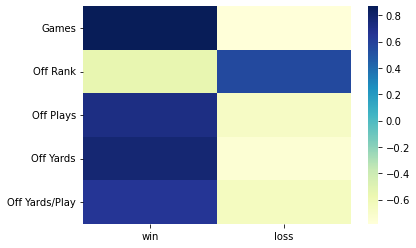

In [83]:
SB.heatmap(DTCorr[['win','loss']][0:5], cmap="YlGnBu")

In [85]:
DTCorr = DT.corr(method='kendall')
DTCorr

Games  Off Rank  Off Plays  Off Yards  \
Games                         1.000000 -0.333696   0.575926   0.569697   
Off Rank                     -0.333696  1.000000  -0.506877  -0.813145   
Off Plays                     0.575926 -0.506877   1.000000   0.611781   
Off Yards                     0.569697 -0.813145   0.611781   1.000000   
Off Yards/Play                0.404334 -0.726481   0.333293   0.723297   
...                                ...       ...        ...        ...   
Turnovers Lost               -0.133555  0.151544  -0.076209  -0.151430   
Turnover Margin               0.310062 -0.213739   0.228781   0.256672   
Avg Turnover Margin per Game  0.310602 -0.215630   0.231043   0.259181   
win                           0.786640 -0.381265   0.521522   0.565604   
loss                         -0.725968  0.391045  -0.499003  -0.553358   

                              Off Yards/Play   Off TDs  Off Yards per Game  \
Games                               0.404334  0.546527            0.333514   
Off Rank                           -0.726481 -0.663847           -0.999642   
Off Plays                           0.333293  0.495063            0.506819   
Off Yards                           0.723297  0.755046            0.812959   
Off Yards/Play                      1.000000  0.687322            0.726502   
...                                      ...       ...                 ...   
Turnovers Lost                     -0.161259 -0.202293           -0.151722   
Turnover Margin                     0.215687  0.323795            0.214059   
Avg Turnover Margin per Game        0.217087  0.323492            0.215948   
win                                 0.434372  0.572367            0.381151   
loss                               -0.436952 -0.563610           -0.390932   

                              Def Rank  Def Plays  Yards Allowed  \
Games                        -0.455670   0.407712      -0.170482   
Off Rank                      0.029699  -0.255078      -0.093165   
Off Plays                    -0.205549   0.344113      -0.028821   
Off Yards                    -0.165086   0.331203       0.015031   
Off Yards/Play               -0.107233   0.226560       0.028097   
...                                ...        ...            ...   
Turnovers Lost                0.121777  -0.071340       0.098171   
Turnover Margin              -0.208876   0.205815      -0.127432   
Avg Turnover Margin per Game -0.205741   0.206085      -0.123990   
win                          -0.490269   0.301080      -0.262519   
loss                          0.495595  -0.276046       0.281201   

                              Yards/Play Allowed  Off TDs Allowed  \
Games                                  -0.454910        -0.364816   
Off Rank                                0.058799         0.054233   
Off Plays                              -0.254478        -0.175367   
Off Yards                              -0.191347        -0.162831   
Off Yards/Play                         -0.105887        -0.124487   
...                                          ...              ...   
Turnovers Lost                          0.127440         0.242697   
Turnover Margin                        -0.279335        -0.330581   
Avg Turnover Margin per Game           -0.275144        -0.325951   
win                                    -0.500276        -0.452450   
loss                                    0.505599         0.470418   

                              Total TDs Allowed  Yards Per Game Allowed  \
Games                                 -0.380177               -0.456026   
Off Rank                               0.054597                0.029942   
Off Plays                             -0.181035               -0.205573   
Off Yards                             -0.163922               -0.165344   
Off Yards/Play                        -0.126391               -0.107485   
...                                         ...                     ...   
Turnovers Lost                      

In [112]:
DTCorr[DTCorr['win']>0.5]['win']

Games                    0.786640
Off Plays                0.521522
Off Yards                0.565604
Off TDs                  0.572367
First Downs              0.559322
Redzone Attempts         0.545688
Redzone Scores           0.587224
Sacks                    0.528784
Sack Yards               0.530658
Touchdowns               0.606609
PAT                      0.618030
Total Points             0.652957
Points Per Game          0.564412
Tackle for Loss Yards    0.512796
win                      1.000000
Name: win, dtype: float64

<AxesSubplot:>

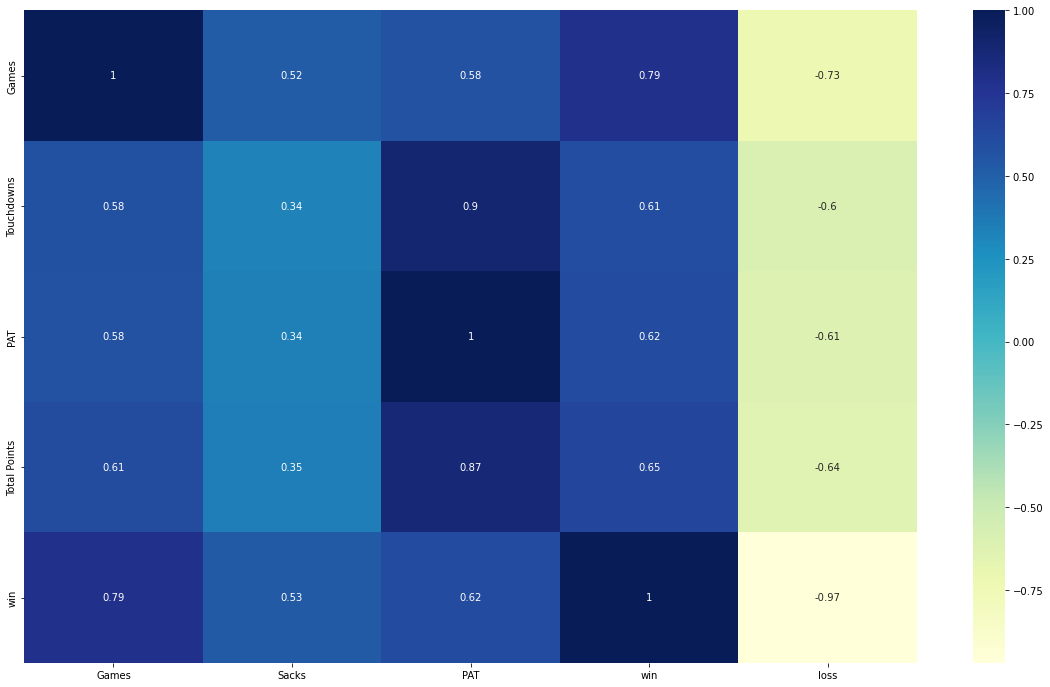

In [109]:
PLT.figure(figsize=(20,12))
SB.heatmap(DTCorr[DTCorr['win']>0.6][['Games','Sacks','PAT','win','loss']], cmap='YlGnBu', annot=True)

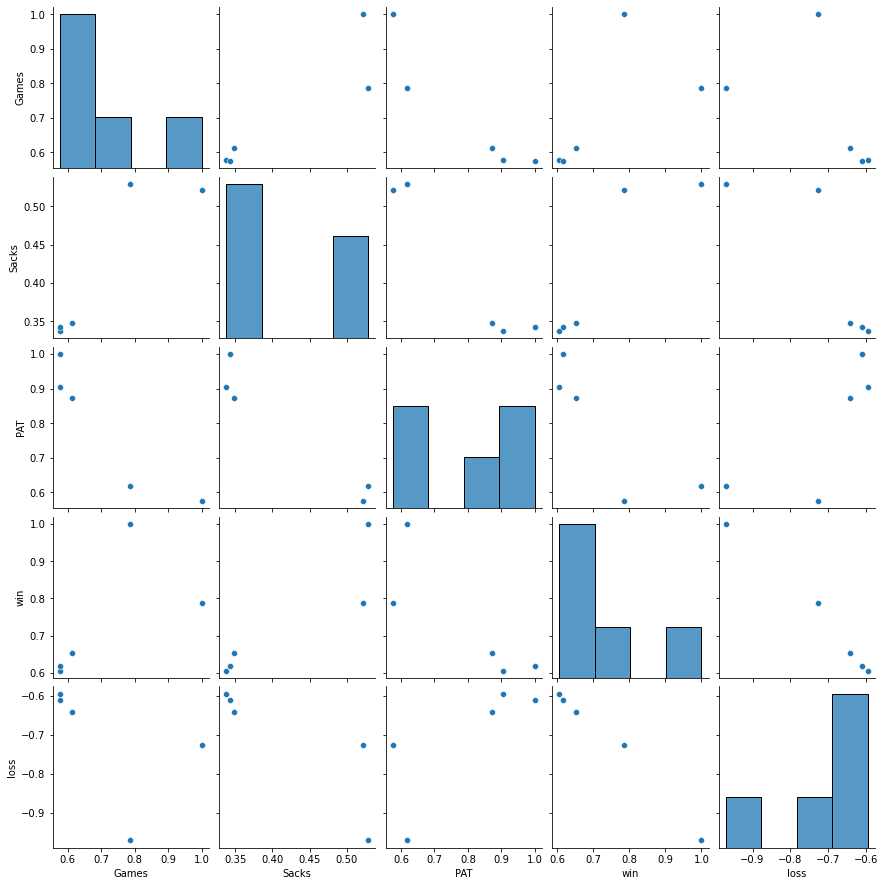

In [113]:
SB.pairplot(DTCorr[DTCorr['win']>0.6][['Games','Sacks','PAT','win','loss']])

### <font color='brown'>board game exercice</font>

In [3]:
DF = pd.read_csv('../datasets/games.csv')
DF.head()

id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0        14383         8.28798               8.14232   
2        210.0    12.0         9262         8.28994               8.06886   
3        240.0    12.0        13294         8.20407               8.05804   
4        150.0    12.0        39883         8.14261               8.04524   

   total_owners  total_traders  total_wanters  total_wishers  total_comments  \
0         26647            372           1219           5865            5347   
1         16519            132           1586           6277            2526   
2         12230             99           1476           5600            1700   
3         14343            362           1084           5075            3378   
4         44362            795            861           5414            9173   

   total_weights  average_weight  
0           2562          3.4785  
1           1423          3.8939  
2            777          3.7761  
3           1642          4.1590  
4           5213          3.2943

In [15]:
DF.dropna(inplace=True)

In [16]:
DF.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

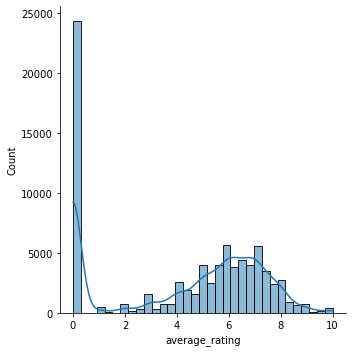

In [19]:
SB.displot(DF['average_rating'],kde=True)

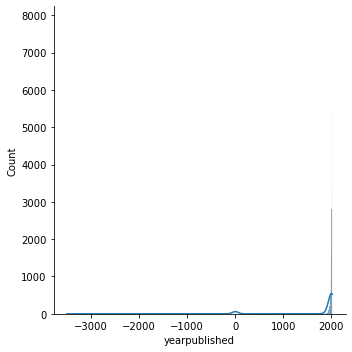

In [21]:
SB.displot(DF['yearpublished'],kde=True)

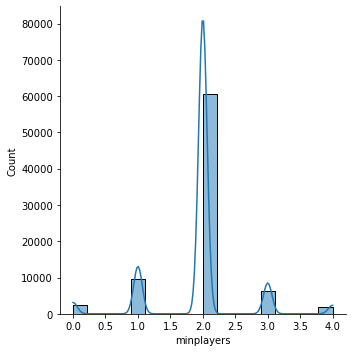

In [24]:
SB.displot(DF['minplayers'],kde=True)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


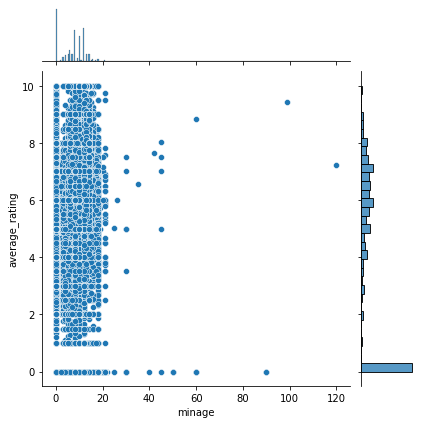

In [25]:
SB.jointplot(DF['minage'],DF['average_rating'])

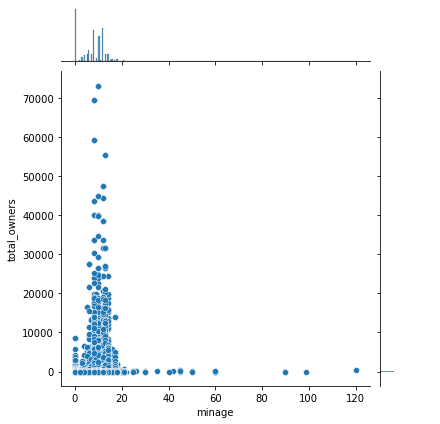

In [27]:
SB.jointplot(x = DF['minage'],y = DF['total_owners'])

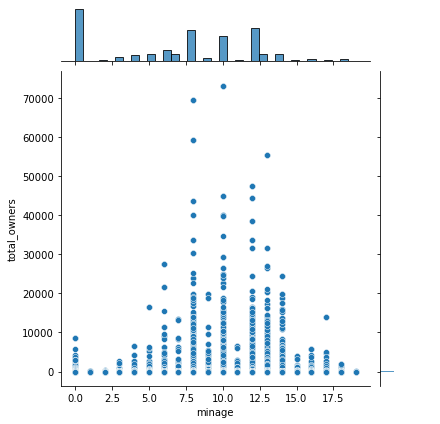

In [28]:
SB.jointplot(x = DF[DF['minage']<20]['minage'],y = DF[DF['minage']<20]['total_owners'])

<AxesSubplot:xlabel='type', ylabel='playingtime'>

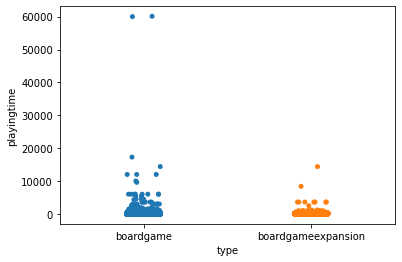

In [29]:
SB.stripplot(x = DF['type'],y = DF['playingtime'])

<AxesSubplot:xlabel='maxplaytime', ylabel='users_rated'>

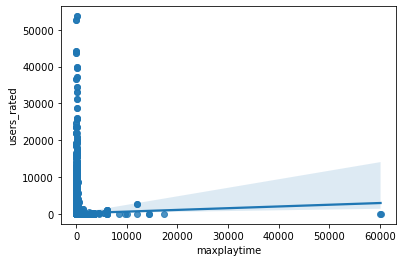

In [39]:
SB.regplot(data=DF, x = 'maxplaytime',y = 'users_rated')

### <font color='brown'>auto mobile exercice</font>